In [2]:
### Note new packages that we are importing!!
from cartopy import crs as ccrs, feature as cfeature        ## for plotting geo spatial data
import cmocean                    ## for nice colormaps.
import matplotlib.path as mpath   ## needed for nice looking polar projections.
import momlevel as ml             ## for computing annual mean and seasonal cycle.
import matplotlib.pyplot as plt
import zarr
import xarray as xr
import numpy as np

In [3]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

### Load in our observations of Sea Ice Concentration from the NOAA OI SST V2 High Resolution Dataset from September 1981 to September 2023 on a 1/4 - degree grid. Here we load in the dataset in as a Zarr store instead of a netcdf file since the dataset is high-resolution (you do not need to know the details of this now). To load in Zarr format data, we use Xarray's `xr.open_zarr()` method instead of `xr.open_dataset`.

### We also load in a file that contains the pre-computed grid cell area for our dataset:



In [4]:
seaice_observations = xr.open_zarr('/home/ees_student/Unit5_Holtzman/data/seaice_concentration_data')
seaice_gridcell_area = xr.open_dataset('/home/ees_student/Unit5_Holtzman/data/cell_area_seaiceconc.nc')

### Function for creating nice looking NorthPolarStereo projections:

In [5]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(x='lon', y='lat',ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Function for creating nice looking SouthPolarStereo projections:

In [6]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(x='lon', y='lat',ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Create a global map using a nice - projection of the time-averaged (Sept 1981 to Sept 2022, full dataset) sea ice concentration. 
* #### Add coastlines to your plot to distinguish land using `ax.coastlines()`.
* #### Make sure to choose appropriate vmin & vmax values for your color bar.
* #### Choose a global projection that is reasonable to display the data .....
  * Explore the Robinson, EckertIV, and other projections.
* #### Choose an appropriate color map to display the data.
  * cmocean maps here: https://matplotlib.org/cmocean/ (hint: what is the data you are displaying??)

### For a full list of projections available via Cartopy please use this reference: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#platecarree

In [7]:
SI_conc=seaice_observations.icec
avg_SI=SI_conc.mean('time')

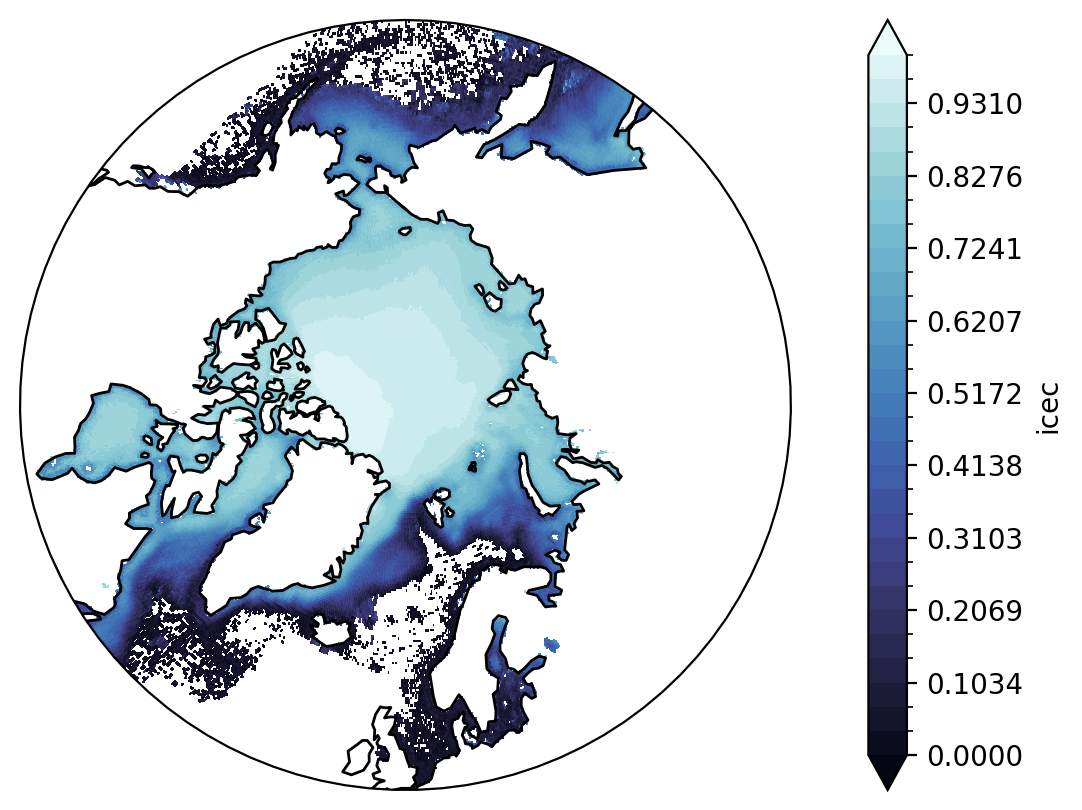

In [8]:
North_Polar(avg_SI,0,1,cmocean.cm.ice)

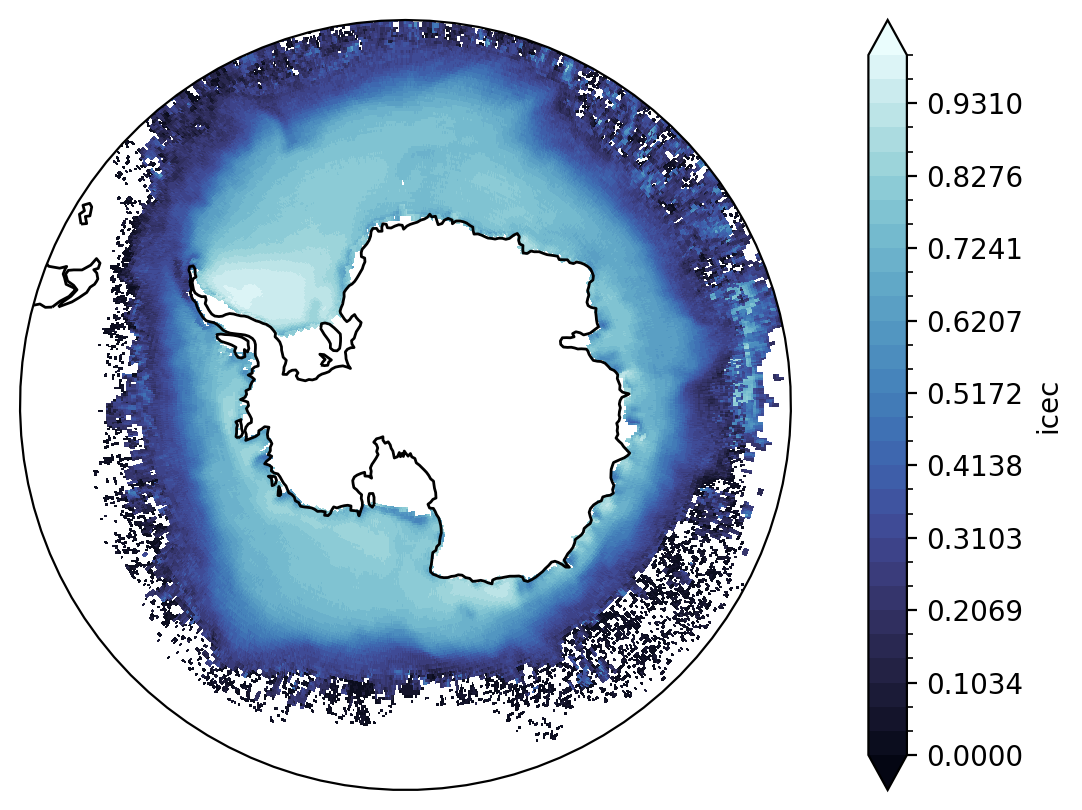

In [9]:
South_Polar(avg_SI,0,1,cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

In [10]:
SI_seasonal=SI_conc.groupby('time.season').mean(dim='time')
winter_SI=SI_seasonal.sel(season=['DJF'])

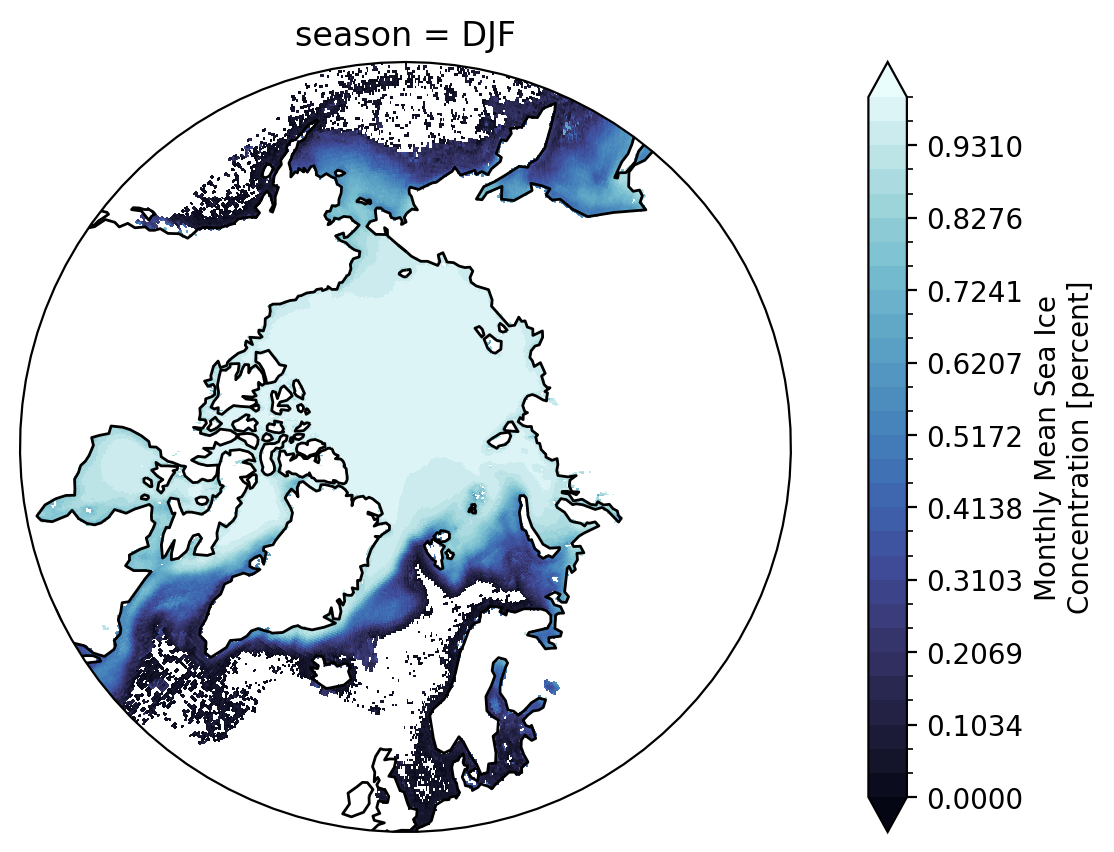

In [11]:
North_Polar(winter_SI, 0,1, cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

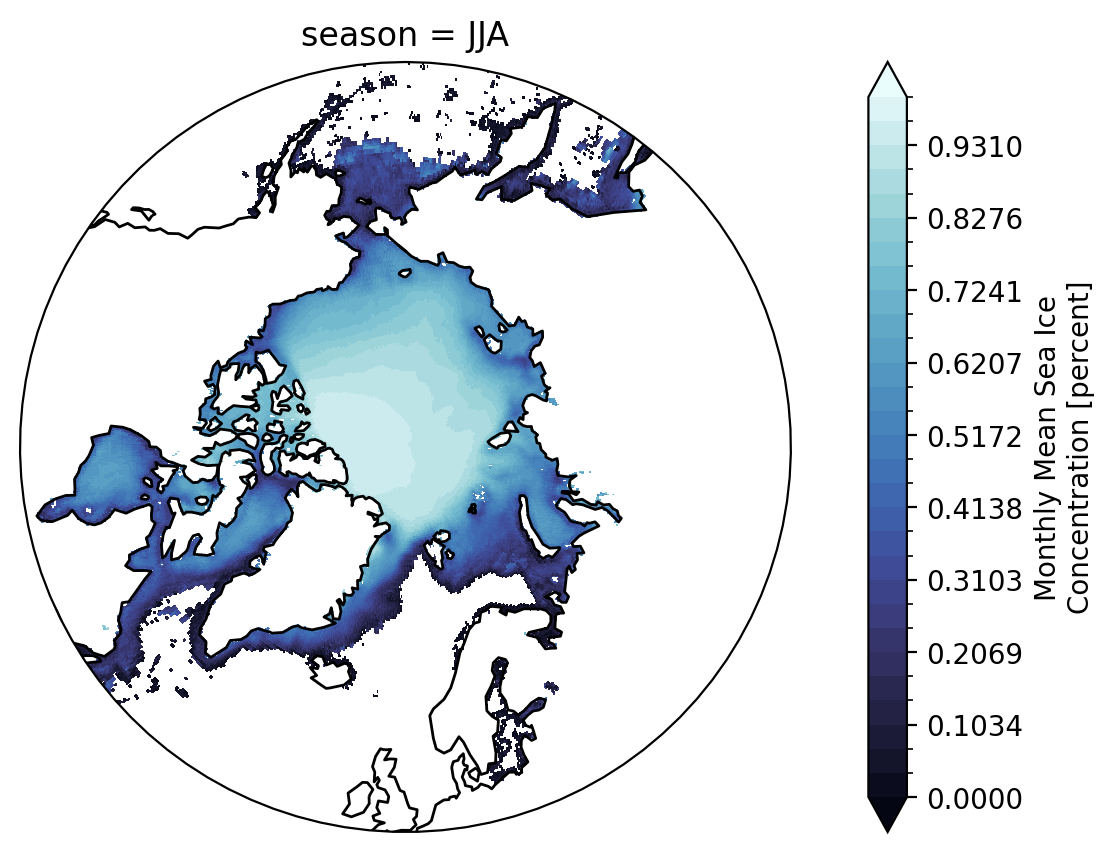

In [12]:
summer_SI=SI_seasonal.sel(season=['JJA'])
North_Polar(summer_SI, 0,1, cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

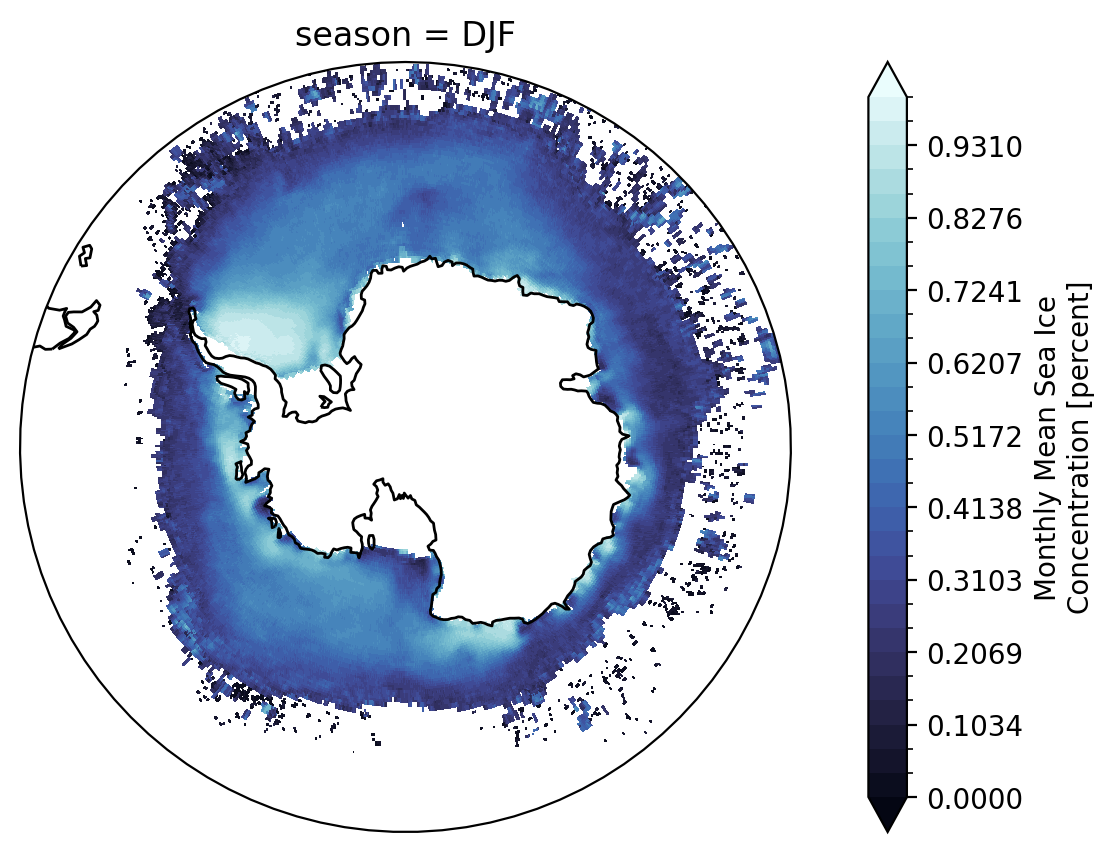

In [13]:
South_Polar(winter_SI, 0,1, cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

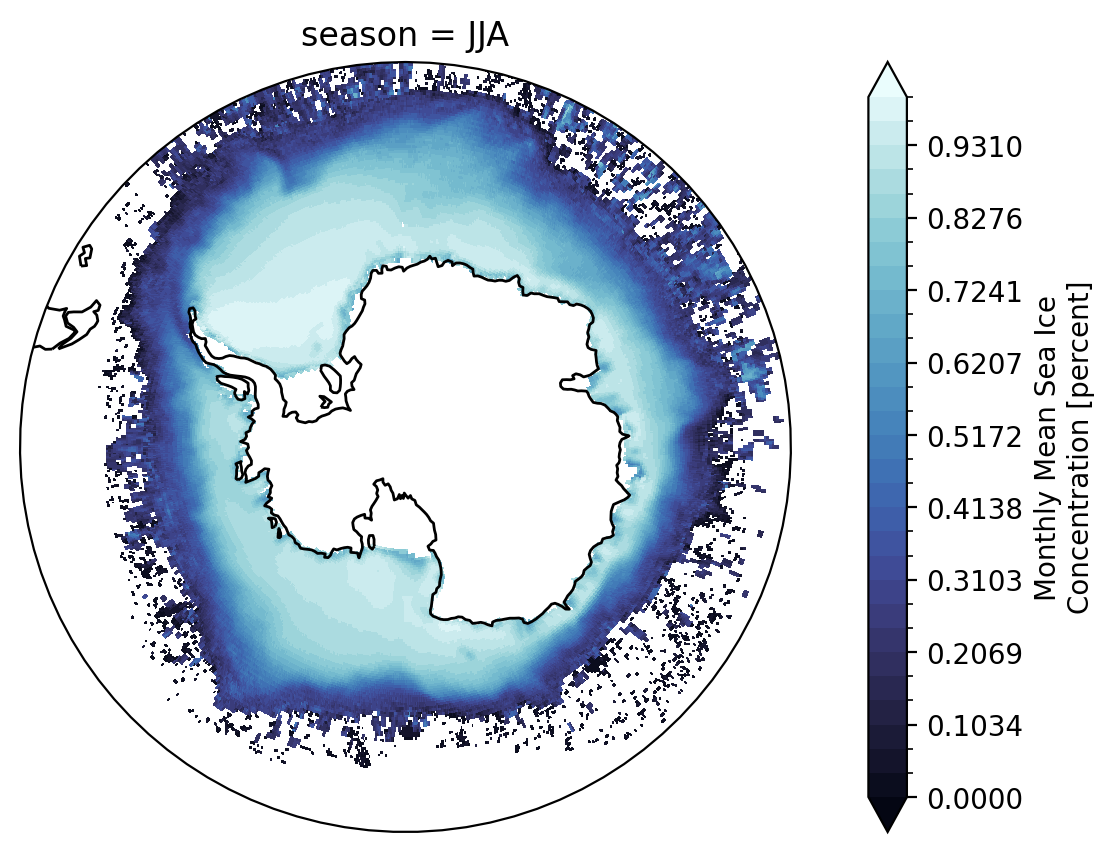

In [14]:
South_Polar(summer_SI, 0,1, cmocean.cm.ice)

## Sea Ice Extent Analysis

#### Total Sea Ice Extent (SIE) in million km^2 is a metric that climate scientists commonly use to monitor sea ice. SIE is computed as:
* The __sum of__ the (fractional sea ice coverage (concentration) * the grid cell area covered by sea ice) = m^2
* Convert m^2 to km^2

#### You have loaded in two datasets that will allow you to do this calculation and reproduce the following plot of the seasonal cycle for Arctic SIE. Produce a plot of Arctic SIE: 
* With the 1982 to 2010 time-average as a thick dashed line
* Use Xarray's `.std()` method to compute the standard deviation (this is just like you did for `.mean(dim='time')`, except your method is now `.std(dim='time')` and place two thin lines on your plot that indicate the 1982 to 2010 time-average + 2 standard deviations and the 1982 to 2010 time-average + 2 standard deviations.
* A thick red line for the annual-cycle of SIE for 2012
* Lines for 2020 and 2021.
* Your x-axis should be in actual months, not integers.

*** Hints: 
* This will involve some slicing in space and time!
* Use Xarray's `.groupby('time.month').mean(dim='time')` method to take your 1982 to 2010 data to an annual / seasonal cycle!
* You can also use .std(dim='time') .....
* Make sure you are checking your DataArrays that you are calculating to make sure you know what you are plotting / the regions / dimensions / etc .... when in doubt, print your array!
* You do not have to do this for this assignment ..... but you can also using ax.fill_between()... specifying your x and y axes just like you did using a Pandas array in our Unit3 module and shade your standard deviations about your mean ....


![](https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147306/arctic_nsidc_2020259_plot.png)

In [15]:
cell_area=seaice_gridcell_area.cell_area
SI_extent= SI_conc*cell_area
arctic_SIextent=SI_extent.sel(lat=slice(0,90))
total_extent=arctic_SIextent.sum(dim=['lat','lon'])
extent_km=total_extent*(10**-6)*(10**-6)

In [16]:
timeavg8210=extent_km.sel(time=slice('1982-01-01','2010-12-01'))
avgextent8210=timeavg8210.groupby('time.month').mean(dim='time')
stddev8210=timeavg8210.groupby('time.month').std(dim='time')

In [17]:
SIE2012=extent_km.sel(time=slice('2012-01-01','2012-12-01'))
avgextent2012=SIE2012.groupby('time.month').mean(dim='time')

In [18]:
SIE2020=extent_km.sel(time=slice('2020-01-01','2020-12-01'))
avgextent2020=SIE2020.groupby('time.month').mean(dim='time')

In [19]:
SIE2021=extent_km.sel(time=slice('2021-01-01','2021-12-01'))
avgextent2021=SIE2021.groupby('time.month').mean(dim='time')

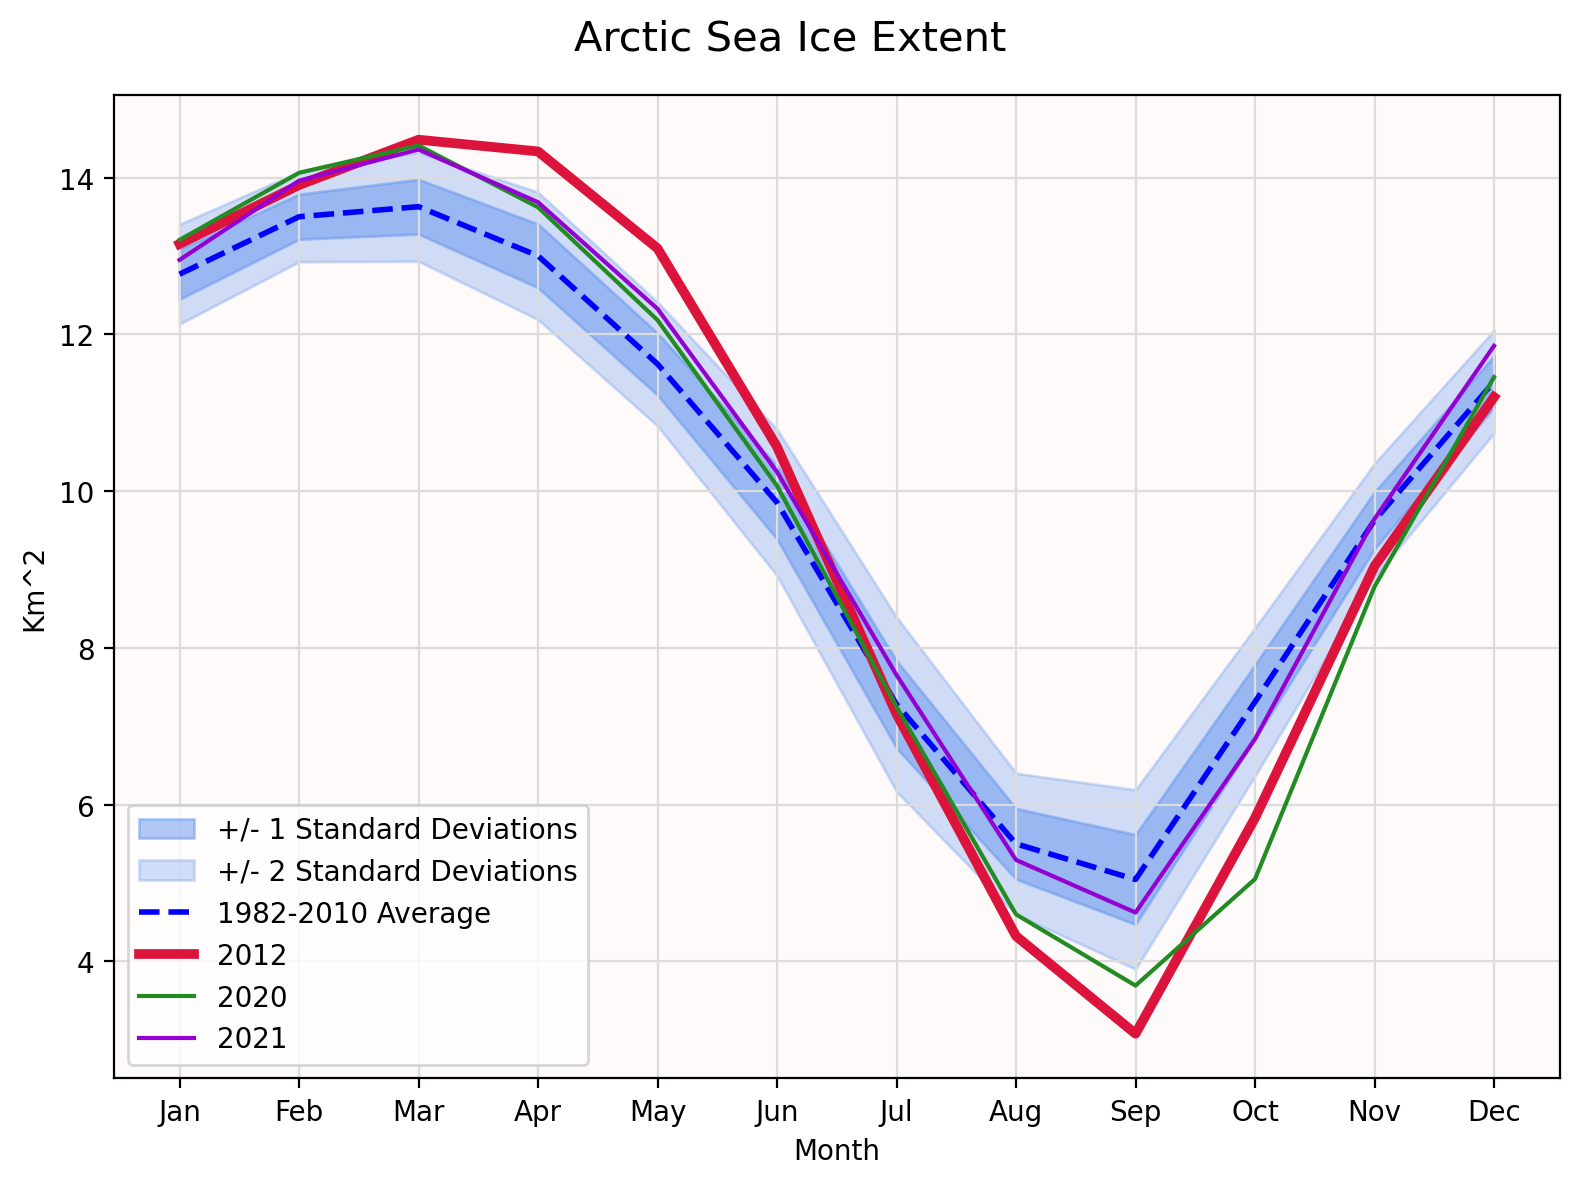

In [34]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Arctic Sea Ice Extent', fontsize=15)

ax.grid(color='gainsboro')

ax.fill_between(avgextent8210['month'], avgextent8210+stddev8210,avgextent8210-stddev8210, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='cornflowerblue')
ax.fill_between(avgextent8210['month'], avgextent8210+(2*stddev8210),avgextent8210-(2*stddev8210), 
                label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')
ax.plot(avgextent8210['month'], 
        avgextent8210, linewidth=2, linestyle='--',
        label='1982-2010 Average', color='blue')

ax.plot(avgextent2012['month'], avgextent2012, linewidth=3.5, label='2012', color='crimson')
ax.plot(avgextent2020['month'], avgextent2020, linewidth=1.5, label='2020', color='forestgreen')
ax.plot(avgextent2021['month'], avgextent2021, linewidth=1.5, label='2021', color='darkviolet')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Km^2')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

## Repeat the above excercise but for Antarctic Sea Ice ... 

In [21]:
cell_area=seaice_gridcell_area.cell_area
SI_extent= SI_conc*cell_area
antarctic_SIextent=SI_extent.sel(lat=slice(-90,0))
total_ant_extent=antarctic_SIextent.sum(dim=['lat','lon'])
ant_extent_km=total_ant_extent/(10**6)/(10**6)

In [22]:
ant_timeavg8210=ant_extent_km.sel(time=slice('1982-01-01','2010-12-01'))
ant_avgextent8210=ant_timeavg8210.groupby('time.month').mean(dim='time')
ant_stddev8210=ant_timeavg8210.groupby('time.month').std(dim='time')

In [23]:
ant_SIE2012=ant_extent_km.sel(time=slice('2012-01-01','2012-12-01'))
ant_avgextent2012=ant_SIE2012.groupby('time.month').mean(dim='time')

In [24]:
ant_SIE2020=ant_extent_km.sel(time=slice('2020-01-01','2020-12-01'))
ant_avgextent2020=ant_SIE2020.groupby('time.month').mean(dim='time')

In [25]:
ant_SIE2021=ant_extent_km.sel(time=slice('2021-01-01','2021-12-01'))
ant_avgextent2021=ant_SIE2021.groupby('time.month').mean(dim='time')

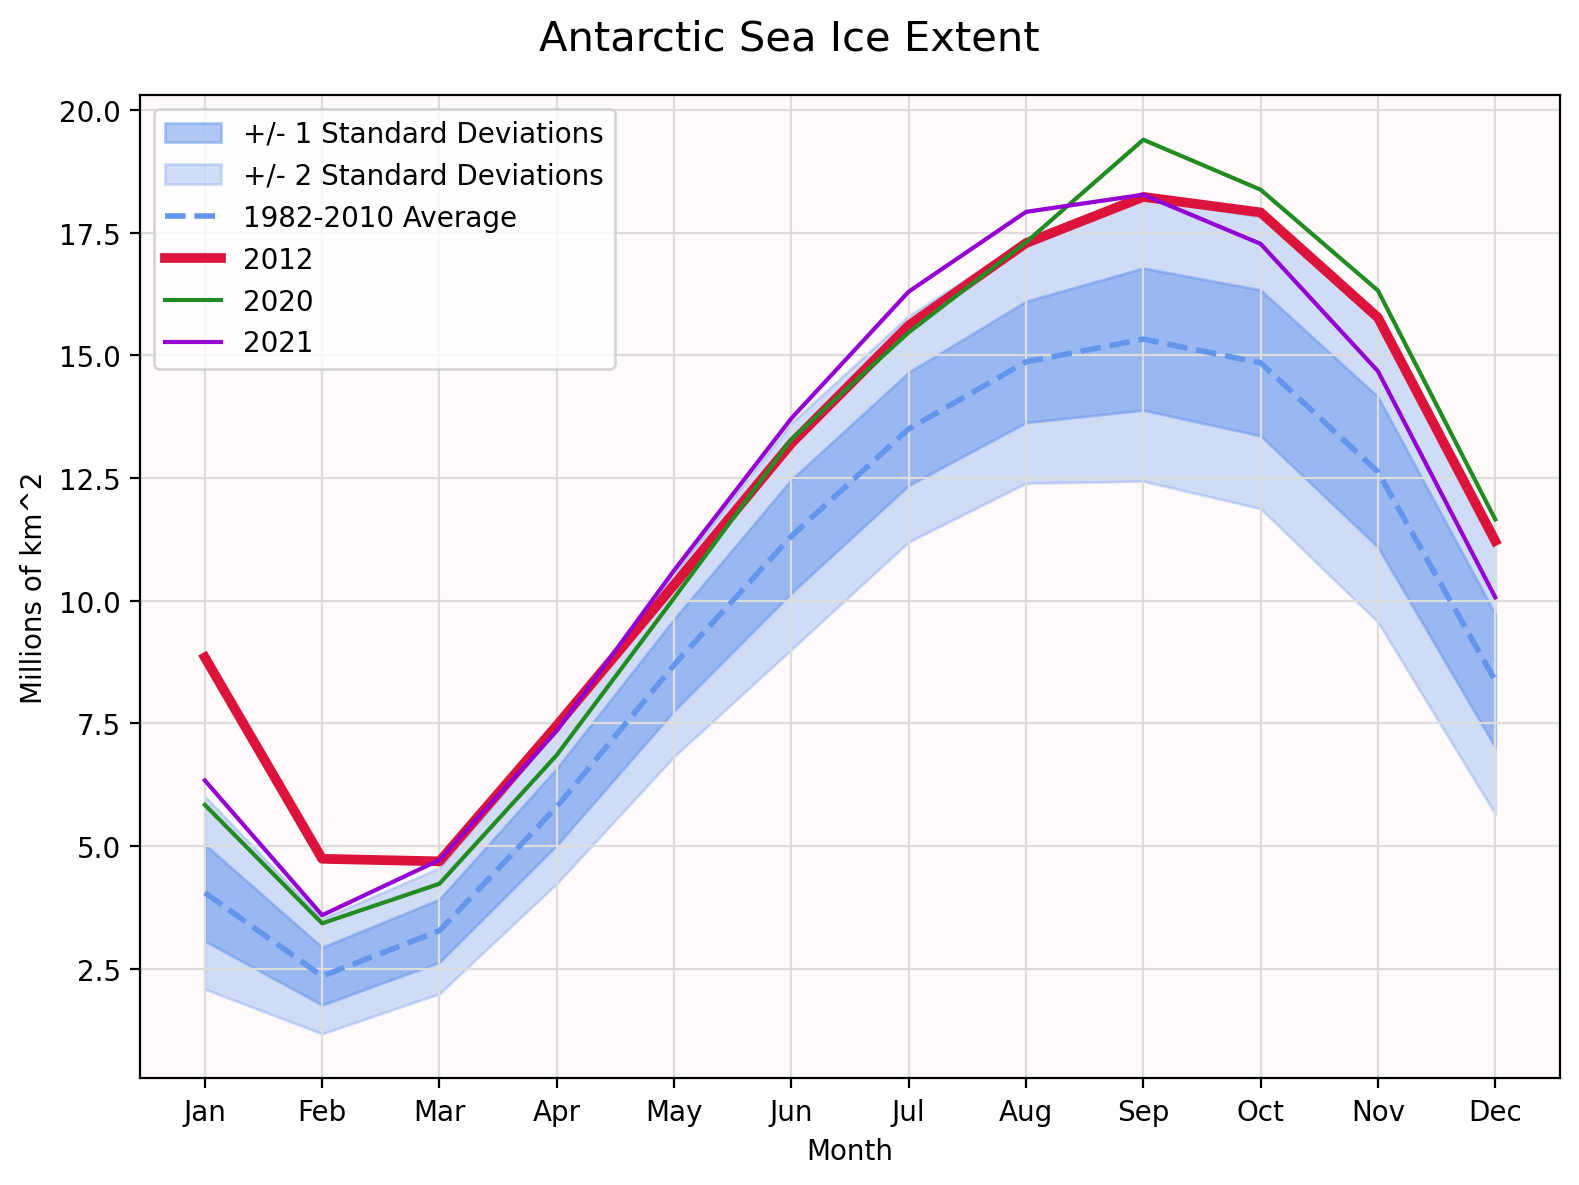

In [33]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Antarctic Sea Ice Extent', fontsize=15)

ax.grid(color='gainsboro')

ax.fill_between(ant_avgextent8210['month'], ant_avgextent8210+ant_stddev8210,
                ant_avgextent8210-ant_stddev8210, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='cornflowerblue')
ax.fill_between(ant_avgextent8210['month'], ant_avgextent8210+(2*ant_stddev8210),
                ant_avgextent8210-(2*ant_stddev8210), 
                label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')
ax.plot(ant_avgextent8210['month'], 
        ant_avgextent8210, linewidth=2, linestyle='--',
        label='1982-2010 Average', color='cornflowerblue')

ax.plot(ant_avgextent2012['month'], ant_avgextent2012, linewidth=3.5, label='2012', color='crimson')
ax.plot(ant_avgextent2020['month'], ant_avgextent2020, linewidth=1.5, label='2020', color='forestgreen')
ax.plot(ant_avgextent2021['month'], ant_avgextent2021, linewidth=1.5, label='2021', color='darkviolet')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend()
ax.set_ylabel('Millions of km^2')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its maximum ...

September is maximum month

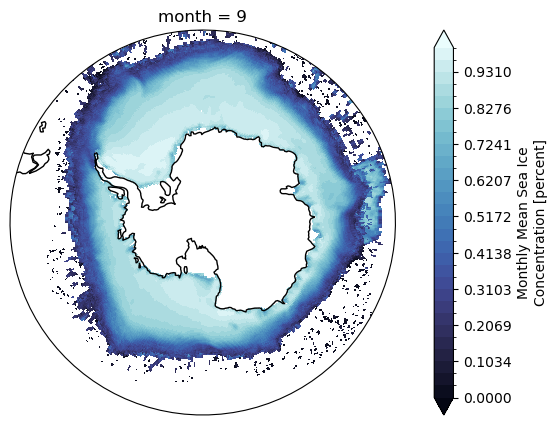

In [40]:
SI_monthly=SI_conc.groupby('time.month').mean(dim='time')
sept=SI_monthly.sel(month=9)
South_Polar(sept, 0,1, cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its minimum ...

February is minimum month

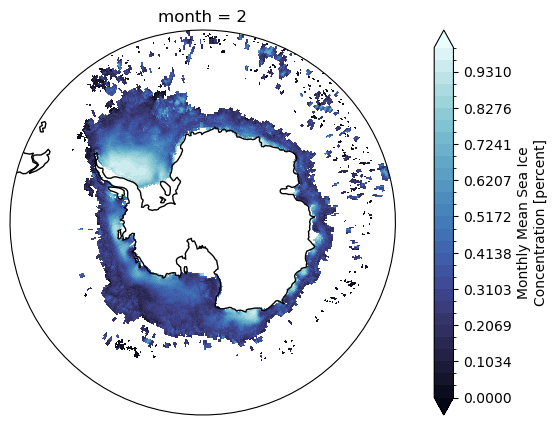

In [39]:
feb=SI_monthly.sel(month=2)
South_Polar(feb, 0,1, cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its minimum ...

Minimum is september

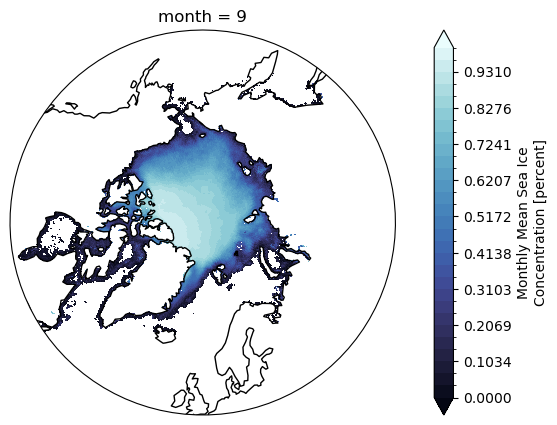

In [41]:
North_Polar(sept, 0,1, cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its maximum ...

maximum is march

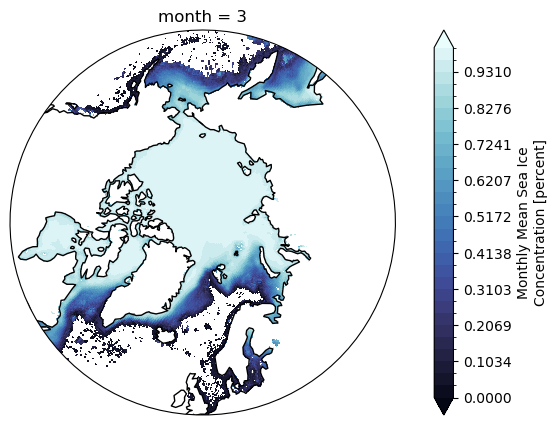

In [43]:
march=SI_monthly.sel(month=3)
North_Polar(march, 0,1,cmocean.cm.ice)